## Importowanie potrzebnych bibliotek

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D

## Zdefiniowanie funkcji celu

In [77]:
def sphere_function(x, y):
    """Funkcja celu - sfera"""
    return x**2 + y**2

def rastrigin_function(x, y):
    """Funkcja celu - Rastrigin"""
    return 20 + x**2 - 10 * np.cos(2 * np.pi * x) + y**2 - 10 * np.cos(2 * np.pi * y)

## Zaimplementowanie klasy odpowiadającej za tworzenie cząsteczek roju

In [78]:
class Particle:
    def __init__(self):
        self.position = np.random.uniform(-10, 10, 2)
        self.velocity = np.random.uniform(-1, 1, 2)
        self.best_position = self.position
        self.best_score = sphere_function(*self.position)

    def update_velocity(self, global_best_position, inertia_weight, cognitive_weight, social_weight):
        r1 = np.random.rand(2)
        r2 = np.random.rand(2)

        cognitive_component = cognitive_weight * r1 * (self.best_position - self.position)
        social_component = social_weight * r2 * (global_best_position - self.position)
        self.velocity = inertia_weight * self.velocity + cognitive_component + social_component

    def update_position(self):
        self.position += self.velocity
        self.position = np.clip(self.position, -10, 10)
        current_score = sphere_function(*self.position)
        if current_score < self.best_score:
            self.best_position = self.position
            self.best_score = current_score

## Funkcja odpowiadająca za wykonanie algorytmu PSO

In [79]:
def particle_swarm_optimization(fitness_function, num_particles, max_iterations):
    swarm = [Particle() for _ in range(num_particles)]
    global_best_position = swarm[0].position  # Inicjalizacja globalnej najlepszej pozycji
    global_best_score = fitness_function(*global_best_position)

    positions = []  # Lista pozycji cząstek w każdej iteracji

    for _ in range(max_iterations):
        iteration_positions = []  # Pozycje cząstek w bieżącej iteracji
        for particle in swarm:
            particle.update_velocity(global_best_position, 0.5, 0.8, 0.8)
            particle.update_position()
            if particle.best_score < global_best_score:
                global_best_position = particle.best_position
                global_best_score = particle.best_score
            iteration_positions.append(particle.position)
        positions.append(iteration_positions)

    return global_best_position, global_best_score, positions

## Wywoływanie algorytmu PSO wraz z odpowiednimi parametrami (MAIN)

In [80]:
# Wywołanie algorytmu PSO dla funkcji sferycznej
fitness_function = sphere_function
best_position, best_score, positions = particle_swarm_optimization(fitness_function, num_particles=50, max_iterations=100)

# Wywołanie algorytmu PSO dla funkcji rastrigin
fitness_function = rastrigin_function
best_position_r, best_score_r, positions_r = particle_swarm_optimization(fitness_function, num_particles=50, max_iterations=100)

## Tworzenie animacji wykresu ruchu cząstek dla funkcji sferycznej

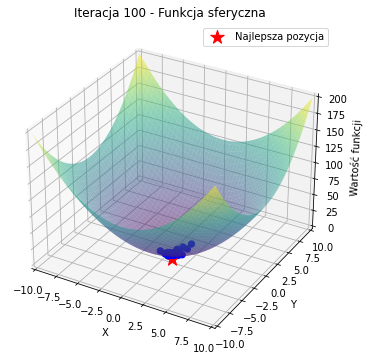

In [81]:
# Tworzenie siatki punktów dla wykresu funkcji sferycznej
x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(x, y)
Z = sphere_function(X, Y)

# Inicjalizacja wykresu dla funkcji sferycznej
fig_sphere = plt.figure(figsize=(8, 6))
ax_sphere = fig_sphere.add_subplot(111, projection='3d')

def animate_sphere(i):
    ax_sphere.clear()
    ax_sphere.set_title(f'Iteracja {i+1} - Funkcja sferyczna')
    ax_sphere.set_xlim(-10, 10)
    ax_sphere.set_ylim(-10, 10)
    ax_sphere.set_zlim(0, 200)
    ax_sphere.set_xlabel('X')
    ax_sphere.set_ylabel('Y')
    ax_sphere.set_zlabel('Wartość funkcji')
    ax_sphere.scatter([p[0] for p in positions[i]], [p[1] for p in positions[i]],
                  [sphere_function(*p) for p in positions[i]], color='b', s=40, alpha=1.0)
    ax_sphere.scatter(best_position[0], best_position[1], best_score, color='r', marker='*', s=200, label='Najlepsza pozycja')
    ax_sphere.plot_surface(X, Y, Z, cmap='viridis', alpha=0.5)  # Wyświetlanie funkcji sferycznej
    ax_sphere.legend()

ani_sphere = FuncAnimation(fig_sphere, animate_sphere, frames=len(positions), interval=600)
ani_sphere.save('animation_sphere.mp4', writer='ffmpeg', dpi=100)

## Tworzenie animacji wykresu ruchu cząstek dla funkcji rastrigin

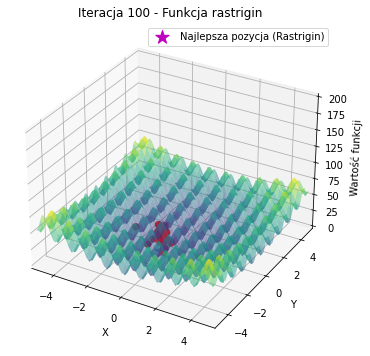

In [82]:
# Tworzenie siatki punktów dla wykresu funkcji rastrigin
x_r = np.linspace(-5.12, 5.12, 100)
y_r = np.linspace(-5.12, 5.12, 100)
X_r, Y_r = np.meshgrid(x_r, y_r)
Z_r = rastrigin_function(X_r, Y_r)

# Inicjalizacja wykresu dla funkcji rastrigin
fig_rastrigin = plt.figure(figsize=(8, 6))
ax_rastrigin = fig_rastrigin.add_subplot(111, projection='3d')

def animate_rastrigin(i):
    ax_rastrigin.clear()
    ax_rastrigin.set_title(f'Iteracja {i+1} - Funkcja rastrigin')
    ax_rastrigin.set_xlim(-5.12, 5.12)
    ax_rastrigin.set_ylim(-5.12, 5.12)
    ax_rastrigin.set_zlim(0, 200)
    ax_rastrigin.set_xlabel('X')
    ax_rastrigin.set_ylabel('Y')
    ax_rastrigin.set_zlabel('Wartość funkcji')
    ax_rastrigin.scatter([p[0] for p in positions_r[i]], [p[1] for p in positions_r[i]],
                     [rastrigin_function(*p) for p in positions_r[i]], color='r', s=40, alpha=1.0)
    ax_rastrigin.scatter(best_position_r[0], best_position_r[1], best_score_r, color='m', marker='*', s=200, label='Najlepsza pozycja (Rastrigin)')
    ax_rastrigin.plot_surface(X_r, Y_r, Z_r, cmap='viridis', alpha=0.5)  # Wyświetlanie funkcji rastrigin
    ax_rastrigin.legend()

ani_rastrigin = FuncAnimation(fig_rastrigin, animate_rastrigin, frames=len(positions_r), interval=600)
ani_rastrigin.save('animation_rastrigin.mp4', writer='ffmpeg', dpi=100)

## Tworzenie animacji wykresu ruchu cząstek dla funkcji sferycznej w wersji 2D

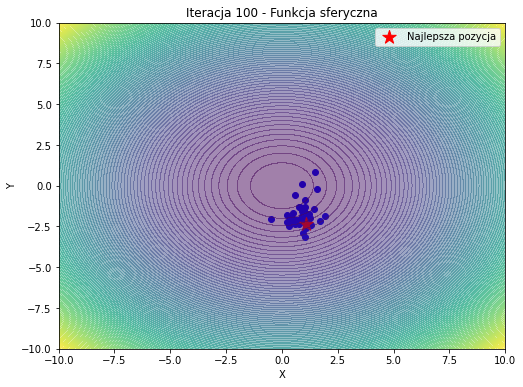

In [83]:
# Inicjalizacja wykresu dla funkcji sferycznej
fig_sphere = plt.figure(figsize=(8, 6))
ax_sphere = fig_sphere.add_subplot(111)

def animate_sphere(i):
    ax_sphere.clear()
    ax_sphere.set_title(f'Iteracja {i+1} - Funkcja sferyczna')
    ax_sphere.set_xlim(-10, 10)
    ax_sphere.set_ylim(-10, 10)
    ax_sphere.set_xlabel('X')
    ax_sphere.set_ylabel('Y')
    ax_sphere.scatter([p[0] for p in positions[i]], [p[1] for p in positions[i]], color='b', marker='o')
    ax_sphere.scatter(best_position[0], best_position[1], color='r', marker='*', s=200, label='Najlepsza pozycja')
    ax_sphere.contourf(X, Y, Z, levels=100, cmap='viridis', alpha=0.5)  # Wyświetlanie funkcji sferycznej
    ax_sphere.legend()

ani_sphere = FuncAnimation(fig_sphere, animate_sphere, frames=len(positions), interval=600)
ani_sphere.save('animation_sphere_top.mp4', writer='ffmpeg', dpi=100)

## Tworzenie animacji wykresu ruchu cząstek dla funkcji rastrigin w wersji 2D

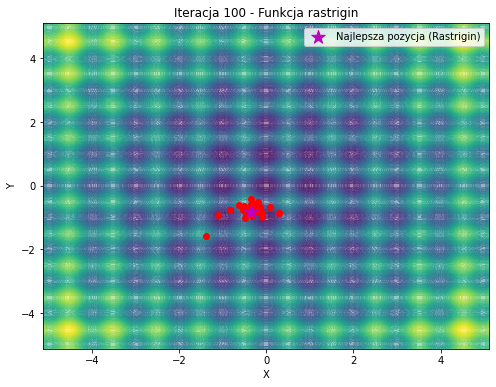

In [84]:
# Tworzenie siatki punktów dla wykresu funkcji rastrigin
x_r = np.linspace(-5.12, 5.12, 100)
y_r = np.linspace(-5.12, 5.12, 100)
X_r, Y_r = np.meshgrid(x_r, y_r)
Z_r = rastrigin_function(X_r, Y_r)

# Inicjalizacja wykresu dla funkcji rastrigin
fig_rastrigin_top = plt.figure(figsize=(8, 6))
ax_rastrigin_top = fig_rastrigin_top.add_subplot(111)

def animate_rastrigin_top(i):
    ax_rastrigin_top.clear()
    ax_rastrigin_top.set_title(f'Iteracja {i+1} - Funkcja rastrigin')
    ax_rastrigin_top.set_xlim(-5.12, 5.12)
    ax_rastrigin_top.set_ylim(-5.12, 5.12)
    ax_rastrigin_top.set_xlabel('X')
    ax_rastrigin_top.set_ylabel('Y')
    ax_rastrigin_top.contourf(X_r, Y_r, Z_r, levels=100, cmap='viridis', alpha=0.5)  # Wyświetlanie funkcji rastrigin
    ax_rastrigin_top.scatter([p[0] for p in positions_r[i]], [p[1] for p in positions_r[i]], color='r', marker='o')
    ax_rastrigin_top.scatter(best_position_r[0], best_position_r[1], color='m', marker='*', s=200, label='Najlepsza pozycja (Rastrigin)')
    ax_rastrigin_top.legend()

ani_rastrigin_top = FuncAnimation(fig_rastrigin_top, animate_rastrigin_top, frames=len(positions_r), interval=600)
ani_rastrigin_top.save('animation_rastrigin_top.mp4', writer='ffmpeg', dpi=100)